In [108]:
import os
import csv
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District Of Columbia':'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [109]:
# data file's path:
crime_data = "crime_data.csv"
cities_csv = "cities1.csv"


In [110]:
# Use Pandas to read data

cities_df = pd.read_csv(cities_csv)
crime_data_df = pd.read_csv(crime_data, thousands = ",")
cities_df=cities_df.rename(columns={"City/Region": "City"})
cities_df.head()
# crime_data_df[crime_data_df["City"]=="Takoma Park"]

,City,State
0,Atlanta,GA
1,Austin,TX
2,Boston,MA
3,Chicago,IL
4,Columbus,OH


In [111]:
# Referencing ONLY CRIME TOTALS (not individual crime-types) ......
# ...within a DataFrame  (based on the above)
# We will put ALL YEARS chosen in this DF.
crime_data_df.columns
#crime_data_df[["City","State","2017 Violent Crime Total","2017 Property Crime Total","2017 All Crimes Total","2016 Population","2016 Violent Crime Total","2016 Property Crime Total","2016 All Crimes Total","2015 Violent Crime Total","2015 Property Crime Total","2015 All Crimes Total" ]].head()

Index(['State\n', 'City', 'Population', 'Violent\ncrime'], dtype='object')

In [112]:

for index,row in crime_data_df.iterrows():
    crime_data_df.set_value(index,"State\n", us_state_abbrev[row["State\n"]])
    
    

In [113]:
crime_data_df[crime_data_df["City"]=="Washington"]
#us_state_abbrev["District Of Columbia"]

crime_data_df.columns

Index(['State\n', 'City', 'Population', 'Violent\ncrime'], dtype='object')

In [114]:
list_of_df = []
for index,row in cities_df.iterrows():
    ge = crime_data_df[crime_data_df["City"]==row["City"]]
    ga = ge[ge["State\n"].str.contains(row["State"])][["City","State\n","Population","Violent\ncrime"]]
    list_of_df.append(ga)

    

In [115]:
merged_df3 = pd.concat(list_of_df)
merged_df3["Crime Rate per 100 people"] = (merged_df3["Violent\ncrime"]/merged_df3["Population"])*100

In [116]:
merged_df3

,City,State,Population,Violent crime,Crime Rate per 100 people
1499,Atlanta,GA,472579.0,5121.0,1.083628
8126,Austin,TX,956911.0,3903.0,0.407875
3272,Boston,MA,673880.0,4767.0,0.707396
1916,Chicago,IL,2725153.0,30126.0,1.105479
6160,Columbus,OH,862515.0,4500.0,0.521730
8229,Dallas,TX,1320939.0,10071.0,0.762412
973,Denver,CO,699259.0,4597.0,0.657410
2414,Indianapolis,IN,866351.0,11907.0,1.374385
715,Los Angeles,CA,4007905.0,28817.0,0.719004
1353,Miami,FL,449469.0,3989.0,0.887492


In [117]:
crime_max = max(merged_df3["Crime Rate per 100 people"])
crime_min = min(merged_df3["Crime Rate per 100 people"])
crime_range = crime_max-crime_min
merged_df3["crime_score"]=1.0
#merged_df9.index[merged_df9["City"]=="chicago"][0]
#crime_data_df[crime_data_df["City"]=="Atlanta"]["State"][crime_data_df.index[crime_data_df["City"]=="Atlanta"][0]]

In [118]:
for index,row in merged_df3.iterrows():
    score = abs((row["Crime Rate per 100 people"]-crime_max)/crime_range*-10)
    score = round(score,1)
    merged_df3.set_value(index,"crime_score",score)

In [119]:
# hospital data file's path:
hospital_data = "Hospital_Summary_Ratings_By_CITY_STATE_For_Upload_SORTED.csv"

# Use Pandas to read data
hospital_data = pd.read_csv(hospital_data)
hospital_reviews = "Total Hospital Review - Averages BY STATE.csv"
hospital_reviews = pd.read_csv(hospital_reviews)

# apply ranking to hopsital reviews
rev_max = max(hospital_reviews["Avg Review (0-5)"])
rev_min = min(hospital_reviews["Avg Review (0-5)"])
rev_range = rev_max-rev_min
hospital_reviews["hosp_score"]=1.0

for index,row in hospital_reviews.iterrows():
    score = abs((row["Avg Review (0-5)"]-rev_max)/rev_range*-10)
    score = round(score,1)
    hospital_reviews.set_value(index,"hosp_score",score)

# merge data frames
merged_df4 = pd.merge(merged_df3, hospital_reviews, how='left', left_on=['State\n'], right_on=['State'])
merged_df5 = merged_df4[['City', 'State', 'crime_score', 'hosp_score']]
merged_df5['Total Score'] = merged_df5['crime_score']+merged_df5['hosp_score']

# apply ranking to total score
tot_max = max(merged_df5["Total Score"])
tot_min = min(merged_df5["Total Score"])
tot_range = tot_max-tot_min
merged_df5["QOL Score"]=1.0

for index,row in merged_df5.iterrows():
    score = abs((row["Total Score"]-tot_min)/tot_range*-10)
    score = round(score,1)
    merged_df5.set_value(index,"QOL Score",score)
    
merged_df5.to_csv("Final QOL Rankings.csv", index=False)
merged_df5

C:\Users\jakec\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jakec\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,City,State,crime_score,hosp_score,Total Score,QOL Score
0,Atlanta,GA,2.4,4.3,6.7,4.5
1,Austin,TX,8.1,3.2,11.3,8.2
2,Boston,MA,5.6,2.2,7.8,5.4
3,Chicago,IL,2.3,3.7,6.0,4.0
4,Columbus,OH,7.2,1.4,8.6,6.0
5,Dallas,TX,5.1,3.2,8.3,5.8
6,Denver,CO,6.0,2.0,8.0,5.6
7,Indianapolis,IN,0.0,1.1,1.1,0.0
8,Los Angeles,CA,5.5,4.5,10.0,7.2
9,Miami,FL,4.1,4.1,8.2,5.7


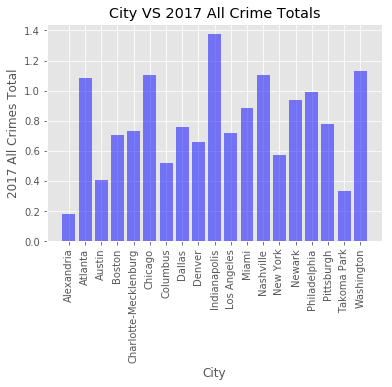

In [120]:
# plot crime data


plt.style.use('ggplot')
plt.bar(merged_df3['City'], merged_df3['Crime Rate per 100 people'], color='b', alpha=0.5, align="center")

# Set the upper and lower limits of our y axis
#plt.ylim(3000,3030)

# Set the upper and lower limits of our x axis
#plt.xlim(0,len(crime_data_df))

# Create a title, x label, and y label for our chart
plt.title("City VS 2017 All Crime Totals")
plt.xlabel("City")
plt.ylabel("2017 All Crimes Total")
plt.xticks(rotation=90)
# Save an image of the chart and print to screen
plt.savefig("Crime Totals 2017.png")
plt.show()

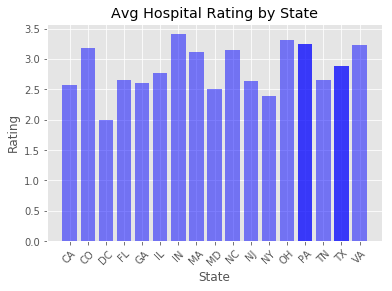

In [121]:
# plot hospital data


plt.style.use('ggplot')
plt.bar(merged_df4['State'], merged_df4['Avg Review (0-5)'], color='b', alpha=0.5, align="center")

# Set the upper and lower limits of our y axis
#plt.ylim(3000,3030)

# Set the upper and lower limits of our x axis
#plt.xlim(0,len(crime_data_df))

# Create a title, x label, and y label for our chart
plt.title("Avg Hospital Rating by State")
plt.xlabel("State")
plt.ylabel("Rating")
plt.xticks(rotation=45)
# Save an image of the chart and print to screen
plt.savefig("Hospital_Ratings.png")
plt.show()